**Yandex Praktikum login: tbetterknow@mail.ru**

**Telegram: @Tibidi**

<h1>Мастерская 1. Проект Music genre prediction [M1_25DS+]<span class="tocSkip"></span></h1>

<h1>Содержание<span class="tocSkip"></span></h1>

1. Загрузка и ознакомление с данными,
2. Предварительная обработка данных,
3. Разведочный анализ данных,
4. Отбор финального набора обучающих признаков,
5. Выбор и обучение моделей

<h1>Описание проекта<span class="tocSkip"></span></h1>

Вы сотрудник Отдела Data Science популярного музыкального стримингового сервиса "МиФаСоль". Сервис расширяет работу с новыми артистами и музыкантами, в связи с чем возникла задача -- правильно классифицировать новые музыкальные треки, чтобы улучшить работу рекомендательной системы. Ваши коллеги из отдела работы со звуком подготовили датасет, в котором собраны некоторые характеристики музыкальных произведений и их жанры. Ваша задача -- разработать модель, позволяющую классифицировать музыкальные произведения по жанрам.

<h1>Дополнительное задание<span class="tocSkip"></span></h1>

Для тех, кому этого покажется мало у нас есть дополнительное задание — реализовать решение с использованием технологии pipeline (из библиотеки sklearn, imblearn).
Подготовка отчета по исследованию. Если останется время можно подготовить полноценный отчет по исследовательской работе Дата Сайнтиста. Примеры хороших отчетов можно посмотреть на сайте Stanford University - отчеты по финальным проектам направления Machine Learning - https://cs229.stanford.edu/projects2014.html. Из примеров понятно наполнение отчета по исследованию, а так же, что главное - понятна сама структура отчета. В реальной работе именно такой формат отчета обычно завершает исследование.

<h1>Описание данных<span class="tocSkip"></span></h1>

**train.csv** - информация (~20000) музыкальных треках, которые будут использоваться в качестве обучающих данных.

**test.csv** - информация (~5000) музыкальных треках, которые будут использоваться в качестве тестовых данных. Ваша задача - предсказать значение 'music_genre' для каждого трека из этого датасета.

**sample_submit.csv** - файл предсказаний в правильном формате.

- instance_id - идентификатор трека в тестовом наборе.
- music_genre - Целевой признак. Для каждого трека предскажите категориальное значение соответствующее музыкальному жанру трека.

<h1>Описание полей данных<span class="tocSkip"></span></h1>

- **instance_id** -Уникальный идентификатор трека

- **track_name** - Название трека

- **acousticness** - Мера уверенности от 0,0 до 1,0 в том, что трек является акустическим. 1,0 означает высокую степень уверенности в том, что трек является акустическим.

- **danceability** - Танцевальность описывает, насколько трек подходит для танцев, основываясь на сочетании музыкальных элементов, включая темп, стабильность ритма, силу ударов и общую регулярность. Значение 0,0 означает наименьшую танцевальность, а 1,0 - наибольшую танцевальность.

- **duration_ms** - Продолжительность трека в миллисекундах.

- **energy** - Энергия это показатель от 0,0 до 1,0, представляющий собой меру интенсивности и активности. Как правило, энергичные композиции ощущаются как быстрые, громкие и шумные. Например, дэт-метал обладает высокой энергией, в то время как прелюдия Баха имеет низкую оценку этого параметра

- **instrumentalness** - Определяет, содержит ли трек вокал. Звуки "Ooh" и "aah" в данном контексте рассматриваются как инструментальные. Рэп или разговорные треки явно являются "вокальными". Чем ближе значение инструментальности к 1,0, тем больше вероятность того, что трек не содержит вокала

- **key** - базовый ключ (нота) произведения

- **liveness** - Определяет присутствие аудитории в записи. Более высокие значения liveness означают увеличение вероятности того, что трек был исполнен вживую. Значение выше 0,8 обеспечивает высокую вероятность того, что трек исполняется вживую

- **loudness** - Общая громкость трека в децибелах (дБ)

- **mode** - Указывает на модальность (мажорную или минорную) трека

- **speechiness** - Речевой характер определяет наличие в треке разговорной речи. Чем более исключительно речевой характер носит запись (например, ток-шоу, аудиокнига, поэзия), тем ближе значение атрибута к 1,0. Значения выше 0,66 характеризуют треки, которые, вероятно, полностью состоят из разговорной речи. Значения от 0,33 до 0,66 характеризуют треки, которые могут содержать как музыку, так и речь, как в виде фрагментов, так и в виде слоев, включая такие случаи, как рэп-музыка. Значения ниже 0,33, скорее всего, представляют музыку и другие неречевые треки.

- **tempo** - Темп трека в ударах в минуту (BPM). В музыкальной терминологии темп представляет собой скорость или темп данного произведения и напрямую зависит от средней продолжительности тактов

- **obtained_date** - дата загрузки в сервис

- **valence** - Показатель от 0,0 до 1,0, характеризующий музыкальный позитив, передаваемый треком. Композиции с высокой валентностью звучат более позитивно (например, радостно, весело, эйфорично), а композиции с низкой валентностью - более негативно (например, грустно, депрессивно, сердито)

- **music_genre** - Музыкальный жанр трека

## Загрузка и ознакомление с данными

In [164]:
# Загружаем трубуемые библиотеки для нашей работы
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [165]:
# Читаем и записываем датасеты в переменные data_train и data_test

try:
    data_train = pd.read_csv('/Users/tbetterknow/Desktop/Яндекс_Практикум/Мастерская 1 MUSIC/kaggle_music_genre_train.csv')
    data_test = pd.read_csv('/Users/tbetterknow/Desktop/Яндекс_Практикум/Мастерская 1 MUSIC/kaggle_music_genre_test.csv')
    
# except:
    #data_train = pd.read_csv(
    #data_test = pd.read_csv(

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>ВОПРОС СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>
    
Большая просьба подсказать как указывать путь на данные после  except с самого Kaggle. Нашел информацию только для collab.

In [166]:
# Смотрим на размеры датасетов data_train и data_test
print(data_train.shape)
print(data_test.shape)

(20394, 16)
(5099, 15)


In [167]:
# Выводим первые 5 строк data_train
data_train.head()

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,25143.0,Highwayman,0.4800,0.670,182653.0,0.351,0.017600,D,0.115,-16.842,Major,0.0463,101.384,4-Apr,0.450,Country
1,26091.0,Toes Across The Floor,0.2430,0.452,187133.0,0.670,0.000051,A,0.108,-8.392,Minor,0.0352,113.071,4-Apr,0.539,Rock
2,87888.0,First Person on Earth,0.2280,0.454,173448.0,0.804,0.000000,E,0.181,-5.225,Minor,0.3710,80.980,4-Apr,0.344,Alternative
3,77021.0,No Te Veo - Digital Single,0.0558,0.847,255987.0,0.873,0.000003,G#,0.325,-4.805,Minor,0.0804,116.007,4-Apr,0.966,Hip-Hop
4,20852.0,Chasing Shadows,0.2270,0.742,195333.0,0.575,0.000002,C,0.176,-5.550,Major,0.0487,76.494,4-Apr,0.583,Alternative


In [168]:
# Выводим первые 5 строк data_test
data_test.head()

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence
0,48564,Low Class Conspiracy,0.301000,0.757,146213.0,0.679,0.00000,A#,0.3030,-7.136,Minor,0.3560,90.361,4-Apr,0.895
1,72394,The Hunter,0.538000,0.256,240360.0,0.523,0.00832,G#,0.0849,-5.175,Major,0.0294,78.385,4-Apr,0.318
2,88081,Hate Me Now,0.005830,0.678,284000.0,0.770,0.00000,A,0.1090,-4.399,Minor,0.2220,90.000,4-Apr,0.412
3,78331,Somebody Ain't You,0.020300,0.592,177354.0,0.749,0.00000,B,0.1220,-4.604,Major,0.0483,160.046,4-Apr,0.614
4,72636,Sour Mango,0.000335,0.421,-1.0,0.447,0.01480,D,0.0374,-8.833,Major,0.2020,73.830,4-Apr,0.121


In [169]:
#Смотрим на данные data_train методом info()
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20394 entries, 0 to 20393
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       20394 non-null  float64
 1   track_name        20394 non-null  object 
 2   acousticness      20394 non-null  float64
 3   danceability      20394 non-null  float64
 4   duration_ms       20394 non-null  float64
 5   energy            20394 non-null  float64
 6   instrumentalness  20394 non-null  float64
 7   key               19659 non-null  object 
 8   liveness          20394 non-null  float64
 9   loudness          20394 non-null  float64
 10  mode              19888 non-null  object 
 11  speechiness       20394 non-null  float64
 12  tempo             19952 non-null  float64
 13  obtained_date     20394 non-null  object 
 14  valence           20394 non-null  float64
 15  music_genre       20394 non-null  object 
dtypes: float64(11), object(5)
memory usage: 

In [170]:
#Смотрим на данные data_test методом info()
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5099 entries, 0 to 5098
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       5099 non-null   int64  
 1   track_name        5099 non-null   object 
 2   acousticness      5099 non-null   float64
 3   danceability      5099 non-null   float64
 4   duration_ms       5099 non-null   float64
 5   energy            5099 non-null   float64
 6   instrumentalness  5099 non-null   float64
 7   key               4941 non-null   object 
 8   liveness          5099 non-null   float64
 9   loudness          5099 non-null   float64
 10  mode              4950 non-null   object 
 11  speechiness       5099 non-null   float64
 12  tempo             4978 non-null   float64
 13  obtained_date     5099 non-null   object 
 14  valence           5099 non-null   float64
dtypes: float64(10), int64(1), object(4)
memory usage: 597.7+ KB


**Вывод по разделу 1. Загрузка и ознакомление с данными**

После первичного / поверхностного ознакомления с данными в обоих датасетах можно выделить следующие моменты:

- В обучающем датасете у нас 20394 записей и 16 полей, тогда как тестовый датасет состоит из 5099 записей и 15 полей;
- Разница в количестве полей между обучающим и тестовым датасетами заключается в том, что поле music_genre является целевым признаком, следовательно его то мы и должны получать, обучив нашу модель на тренировочных данных и проверив результат на тестовом датасете;
- Невооруженным взглядом видно, что оба датасета имееют моменты, которые необходимо исправить, например поле instance_id имеет разный тип данных в обучающем и тестовом датасетах, также поле key в некоторых значениях содержат знак #, что возможно является некорректным обозначением, также необходимо поразамышлять в контексте задачи какие поля могут быть удалены, например поле obtained_date указывает на дату загрузки в сервис, учитывая задачу классифиции музыкальных произведений по жанрам, требуется ли нам данная информация?
- Дополнительно, мы видим, что в полях key, mode, tempo присутствуют пропуски в обоих датасетах, необходимо проверить эти поля, а также проеврить все поля на наличие неявных дубликатов;
- Что касается названия полей, то они приведены в корректном змеином формате, здесь исправления не нужны;

Переходим к следующему этапу Предварительной обработке данных.

## Предварительная обработка данных

**2.1 Изменение типов данных полей**

In [171]:
# Изменяем типы данных на целочисленный int в обучающем датасете, создав список из полей
int_cols_train = ['instance_id', 'duration_ms']
data_train[int_cols_train] = data_train[int_cols_train].astype(int)

# Изменяем поле duration_ms на целочисленный int в тестовом датасете
data_test['duration_ms'] = data_test['duration_ms'].astype(int)


**2.2 Удаление ненужных полей**

После более глубокого изучения Описания полей данных, учитывая поставленную задачу, было принято решение в удалении полей obtained_date и track_name как ненужные, которые могут ухудщать обучение моделей.

In [172]:
# Удаляем поля, создав список и передав его функции drop в обоих датасетах

cols_to_drop = ['obtained_date', 'track_name']
data_train = data_train.drop(cols_to_drop, axis=1)
data_test = data_test.drop(cols_to_drop, axis=1)

In [173]:
#Проверяем, сделанные предобразования в обучающем датасете методом info()
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20394 entries, 0 to 20393
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       20394 non-null  int64  
 1   acousticness      20394 non-null  float64
 2   danceability      20394 non-null  float64
 3   duration_ms       20394 non-null  int64  
 4   energy            20394 non-null  float64
 5   instrumentalness  20394 non-null  float64
 6   key               19659 non-null  object 
 7   liveness          20394 non-null  float64
 8   loudness          20394 non-null  float64
 9   mode              19888 non-null  object 
 10  speechiness       20394 non-null  float64
 11  tempo             19952 non-null  float64
 12  valence           20394 non-null  float64
 13  music_genre       20394 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 2.2+ MB


In [174]:
#Проверяем, сделанные предобразования в тестовом датасете методом info()
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5099 entries, 0 to 5098
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       5099 non-null   int64  
 1   acousticness      5099 non-null   float64
 2   danceability      5099 non-null   float64
 3   duration_ms       5099 non-null   int64  
 4   energy            5099 non-null   float64
 5   instrumentalness  5099 non-null   float64
 6   key               4941 non-null   object 
 7   liveness          5099 non-null   float64
 8   loudness          5099 non-null   float64
 9   mode              4950 non-null   object 
 10  speechiness       5099 non-null   float64
 11  tempo             4978 non-null   float64
 12  valence           5099 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 518.0+ KB


**2.3 Проверка данных на наличие пропусков, явных и неявных дубликатов, а также заполнение этих значений**

In [175]:
# Создадим функцию для вывода обоих показателей
def nas_duplicates(data):
    print("Количество пропусков: ", data.isna().sum().sum())
    print("Дубликаты: ", data.duplicated().sum())

In [176]:
# Выводим значения пропусков и явных дубликатов в обучающем датасете
nas_duplicates(data_train)

Количество пропусков:  1683
Дубликаты:  0


In [177]:
# Выводим значения пропусков и явных дубликатов в тестовом датасете
nas_duplicates(data_test)

Количество пропусков:  428
Дубликаты:  0


In [178]:
# Считаем процент пропусков в обучающем датасете
print(data_train.isnull().sum() / len(data_train) * 100)

instance_id         0.000000
acousticness        0.000000
danceability        0.000000
duration_ms         0.000000
energy              0.000000
instrumentalness    0.000000
key                 3.604001
liveness            0.000000
loudness            0.000000
mode                2.481122
speechiness         0.000000
tempo               2.167304
valence             0.000000
music_genre         0.000000
dtype: float64


In [179]:
# Считаем процент пропусков в тестовом датасете
print(data_test.isnull().sum() / len(data_test) * 100)

instance_id         0.000000
acousticness        0.000000
danceability        0.000000
duration_ms         0.000000
energy              0.000000
instrumentalness    0.000000
key                 3.098647
liveness            0.000000
loudness            0.000000
mode                2.922142
speechiness         0.000000
tempo               2.373014
valence             0.000000
dtype: float64


Итак, в наших датасетах присутствуют как пропуски. Явных дубликатов мы не обнаружили.
Как мы уже раньше выявили, пропуски присутствуют в таких полях как key (3% пропусков), mode (2% пропусков) и tempo (2% пропусков). Посмотрим на эти поля более детально.

In [180]:
# Посмотрим на уникальные значения поля key в обучающем датасете
data_train['key'].unique()

array(['D', 'A', 'E', 'G#', 'C', 'D#', 'A#', 'F', 'F#', nan, 'G', 'C#',
       'B'], dtype=object)

In [181]:
# Посмотрим на уникальные значения поля key в тестовом датасете
data_test['key'].unique()

array(['A#', 'G#', 'A', 'B', 'D', 'F#', 'F', 'G', 'C', nan, 'D#', 'C#',
       'E'], dtype=object)

In [182]:
# Сравним совпадают ли уникальные значения в двух датасетах методом value_counts и конкатенацией
unique_values_train = data_train['key'].value_counts()
unique_values_test = data_test['key'].value_counts()

# Конкатенация результатов
combined_counts = pd.concat([unique_values_train, unique_values_test], axis=1, keys=['data_train', 'data_test'])
print(combined_counts)

    data_train  data_test
G         2304        527
C         2149        530
C#        2125        495
D         2110        557
A         2013        465
F         1616        464
B         1522        397
E         1516        349
G#        1268        314
A#        1224        354
F#        1206        333
D#         606        156


In [183]:
# Посмотрим на количество пропусков по каждому полю в обучающем датасете
data_train.isna().sum()

instance_id           0
acousticness          0
danceability          0
duration_ms           0
energy                0
instrumentalness      0
key                 735
liveness              0
loudness              0
mode                506
speechiness           0
tempo               442
valence               0
music_genre           0
dtype: int64

In [184]:
# Посмотрим на количество пропусков по каждому полю в тестовом датасете
data_test.isna().sum()

instance_id           0
acousticness          0
danceability          0
duration_ms           0
energy                0
instrumentalness      0
key                 158
liveness              0
loudness              0
mode                149
speechiness           0
tempo               121
valence               0
dtype: int64

In [185]:
# Посмотрим на уникальные значения поля mode в обучающем датасете
data_train['mode'].unique()

array(['Major', 'Minor', nan], dtype=object)

In [186]:
# Посмотрим на уникальные значения поля mode в тестовом датасете
data_test['mode'].unique()

array(['Minor', 'Major', nan], dtype=object)

In [187]:
# Посмотрим на уникальные значения поля tempo в обучающем датасете
data_train['tempo'].unique()

array([101.384, 113.071,  80.98 , ...,  87.413,  76.879, 146.803])

По результатам более глубокого изучения полей key, mode и tempo мы получили следующие результаты:

**1. Поле key**

Изучив открытые источники по теме "музыка", была найдена информация, что знаком решетки (#) обозначается ДИЕЗ, что означает повышение ноты на полутон (или можно еще сказать на половину тона).
Источник: https://muz-teoretik.ru/diez-bemol-i-bekar-znaki-alteracii-v-muzyke/
Поэтому, в данном поле присутствуют только пропуски (735 в обучающем и 158 в тестовом датасете). Что касается дубликатов, то они отсутствуют, все значения являются уникальными.

**2. Поле mode**

В данном поле присутствуют только пропуски в количестве 506 в обучающем датасете и 149 в тестовом, соответственно. Уникальных значений 3 (Minor, Major и nan).

**3. Поле tempo**

Данное поле содержит информацию о Темпе трека в ударах в минуту (BPM). Это означает, данные в основном уникальные, но и повторяющиеся значения имеют место быть. Поэтому здесь обращаем внимание только на пропуски, которых мы насчитали 442 в обучающем датасете и 121 в тестовом датасете, соответственно.

Несмотря на то, что доля пропусков в полях key (3% пропусков), mode (2% пропусков) и tempo (2% пропусков) не существенное, удалять мы их не будем, поэтому следующим шагом нам необходимо заполнить их, но перед этим необходимо избавиться от выявленных дубликатов в количестве 7 строк в обучающем датасете и 30 строк в тестовом датасете (удаление 37 строк не окажет сильного влияния на качество обучение моделей поскольку количество не такое большое).


In [188]:
# Выведем строки - дубликаты в обучающем датасете
data_train[data_train.duplicated()]


,instance_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre


In [189]:
# Выведем строки - дубликаты в тестовом датасете
data_test[data_test.duplicated()]

,instance_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence


In [190]:
# Удаляем дубликаты в обоих датасетах
data_train.drop_duplicates(inplace=True)
data_test.drop_duplicates(inplace=True)

In [191]:
# Теперь заменяем пропуски в полях key и mode в обоих датасетах на значение unknown
fill_values = {'key': 'unknown', 'mode': 'unknown'}
data_train.fillna(value=fill_values, inplace=True)
data_test.fillna(value=fill_values, inplace=True)

In [192]:
# В поле tempo мы заменим пропуски в обоих датасетах средним значением
# Важный момент - мы заполняем пропуски в тестовом датасете средним значением
# из обучающего датасета, так как данных там больше и медианное значение более корректное
data_train['tempo'].fillna(data_train['tempo'].mean(), inplace=True)
data_test['tempo'].fillna(data_train['tempo'].mean(), inplace=True)

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>ВОПРОС СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>
    
Изначально заменил пропуски в поле tempo на медианное значение, но после заполнения пропусков на среднее значение, результат в Kagle улучшился. Интересно узнать твое мнение. Спасибо заранее

In [193]:
# Проверяем наличие дубликатов и пропусков в обучающем датасете после преобразования
nas_duplicates(data_train)

Количество пропусков:  0
Дубликаты:  0


In [194]:
# Проверяем наличие дубликатов и пропусков в тестовом датасете после преобразования
nas_duplicates(data_test)

Количество пропусков:  0
Дубликаты:  0


In [195]:
# Также, на всякий случай посмотрим не уникальные значения нашего целевого признака music_genre
# в обучающем датасете
data_train['music_genre'].value_counts()


Blues          2858
Alternative    2601
Electronic     2564
Rap            2428
Rock           2165
Country        2120
Anime          1901
Classical      1373
Jazz           1239
Hip-Hop        1145
Name: music_genre, dtype: int64

В поле music_genre присутствует 10 уникальных классов жанров музыки, дубликатов не обнаружено.

**Вывод по разделу 2. Предварительная обработка данных**

По результатам Предварительной обработки данных мы удалили два поля (obtained_at и track_name), определив их как поля с ненужной информацией, которая будет пагубно влиять на обучение моделей. Также мы избавились от пропусков (1683 в обучающем датасете и 428 в тестовом) и дубликатов (7 в обучающем датасете и 30 в тестовом датасете). Неявных дубликатов обнаружено не было. В категориальных полях key и mode мы заменили пропуски на значение unknown. В поле с численными данными tempo мы заменили пропуски на медианное значение.

Следующим шагом переходим к Разведочному анализу данных (EDA).

## Разведочный анализ данных (EDA)

Первым делом посмотрим на корреляцию полей / признаков к нашему целевому признаку music_genre с помощью тепловой карты, а также в табличном вырианте. Для того чтобы сформировать данные корреляции, необходимо закодировать категориальные данные в числовые, а именно поля key, mode и целевой признак music_genre. Для этой задачи будем использовать LabelEncoder из библиотеки sklearn. Опять же важный момент - здесь также кодирование в тестовом наборе данных должно производиться с помощью экземпляра кодера, который был настроен на обучающем наборе данных, тот же прием, что и при заполнении пропусков медианным значением.

**3.1 Кодирование категориальных данных в числовые**

In [196]:
# Кодируем категориальные данные в полях key и mode в числовые в обучающем датасете
# Создаем кодеры
label_encoded_key = LabelEncoder()
label_encoded_mode = LabelEncoder()
label_encoded_mg = LabelEncoder()

# Кодируем данные в поле key в обоих датасетах
data_train['key'] = label_encoded_key.fit_transform(data_train['key'])
data_test['key'] = label_encoded_key.transform(data_test['key'])

# Кодируем данные в поле mode в обоих датасетах
data_train['mode'] = label_encoded_mode.fit_transform(data_train['mode'])
data_test['mode'] = label_encoded_mode.transform(data_test['mode'])

# Кодируем данные в поле music_genre в обучающем датасете
data_train['music_genre'] = label_encoded_mg.fit_transform(data_train['music_genre'])


In [197]:
# Проверяем выполненную кодировку выводом первых 5 строк обучающего датасета
data_train.head()

,instance_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,25143,0.4800,0.670,182653,0.351,0.017600,5,0.115,-16.842,0,0.0463,101.384,0.450,4
1,26091,0.2430,0.452,187133,0.670,0.000051,0,0.108,-8.392,1,0.0352,113.071,0.539,9
2,87888,0.2280,0.454,173448,0.804,0.000000,7,0.181,-5.225,1,0.3710,80.980,0.344,0
3,77021,0.0558,0.847,255987,0.873,0.000003,11,0.325,-4.805,1,0.0804,116.007,0.966,6
4,20852,0.2270,0.742,195333,0.575,0.000002,3,0.176,-5.550,0,0.0487,76.494,0.583,0


In [198]:
# Проверяем выполненную кодировку выводом первых 5 строк тестового датасета
data_test.head()

,instance_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,48564,0.301000,0.757,146213,0.679,0.00000,1,0.3030,-7.136,1,0.3560,90.361,0.895
1,72394,0.538000,0.256,240360,0.523,0.00832,11,0.0849,-5.175,0,0.0294,78.385,0.318
2,88081,0.005830,0.678,284000,0.770,0.00000,0,0.1090,-4.399,1,0.2220,90.000,0.412
3,78331,0.020300,0.592,177354,0.749,0.00000,2,0.1220,-4.604,0,0.0483,160.046,0.614
4,72636,0.000335,0.421,-1,0.447,0.01480,5,0.0374,-8.833,0,0.2020,73.830,0.121


**3.2 Изучение корреляции признаков**

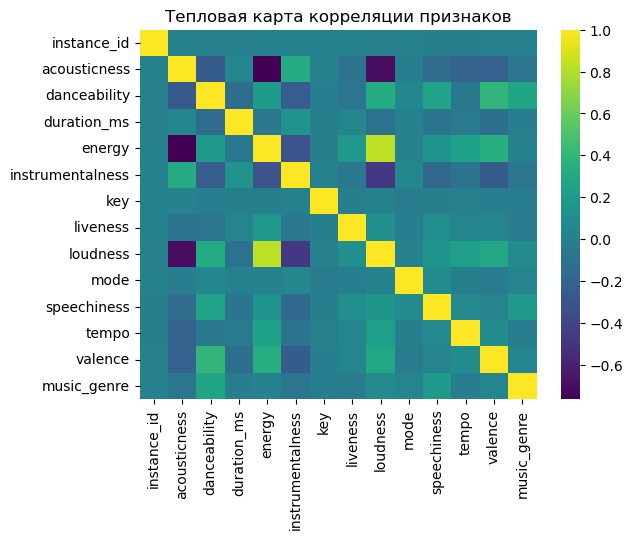

In [199]:
# Построение тепловой карты корреляции признаков обучающего датасета
correlation_matrix = data_train.corr()

sns.heatmap(correlation_matrix, cmap='viridis')
plt.title('Тепловая карта корреляции признаков')
plt.show()

In [200]:
# Построим общую корреляционную матрицу и присвоим ей имя для дальнейшего использования при формировании
# признаков для обучения моделей
corr_matrix = data_train.corr()
corr_matrix

,instance_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
instance_id,1.000000,0.003948,-0.000881,-0.002828,0.004788,0.009771,0.003355,0.002304,-0.000079,0.004631,-0.013367,-0.011032,0.000173,-0.002357
acousticness,0.003948,1.000000,-0.273418,0.043788,-0.764949,0.316769,0.009435,-0.091847,-0.699716,-0.025454,-0.144587,-0.212512,-0.221677,-0.078429
danceability,-0.000881,-0.273418,1.000000,-0.145350,0.182730,-0.253837,-0.013858,-0.080752,0.317236,0.049264,0.257981,-0.059124,0.390220,0.277984
duration_ms,-0.002828,0.043788,-0.145350,1.000000,-0.055477,0.141540,-0.009097,0.037041,-0.096941,0.005898,-0.082702,-0.041173,-0.126988,-0.022059
energy,0.004788,-0.764949,0.182730,-0.055477,1.000000,-0.319971,-0.007379,0.176778,0.821801,0.011247,0.150511,0.247982,0.347967,0.011156
instrumentalness,0.009771,0.316769,-0.253837,0.141540,-0.319971,1.000000,0.001967,-0.063769,-0.481391,0.055855,-0.176950,-0.094429,-0.259960,-0.081806
key,0.003355,0.009435,-0.013858,-0.009097,-0.007379,0.001967,1.000000,-0.006667,0.000809,-0.039744,-0.007132,-0.000507,-0.014524,-0.015400
liveness,0.002304,-0.091847,-0.080752,0.037041,0.176778,-0.063769,-0.006667,1.000000,0.106557,-0.019001,0.098580,0.038479,0.037165,-0.033384
loudness,-0.000079,-0.699716,0.317236,-0.096941,0.821801,-0.481391,0.000809,0.106557,1.000000,0.008070,0.152085,0.217711,0.284016,0.073915
mode,0.004631,-0.025454,0.049264,0.005898,0.011247,0.055855,-0.039744,-0.019001,0.008070,1.000000,0.071118,-0.008290,-0.036254,0.034665


In [201]:
# Смотрим на корреляцию признаков к целевому признаку music_genre методом Пирсона
# с помощью функции corr
corr_train= data_train.corr(method='pearson')['music_genre'][:]
corr_train

instance_id        -0.002357
acousticness       -0.078429
danceability        0.277984
duration_ms        -0.022059
energy              0.011156
instrumentalness   -0.081806
key                -0.015400
liveness           -0.033384
loudness            0.073915
mode                0.034665
speechiness         0.190360
tempo              -0.026060
valence             0.035240
music_genre         1.000000
Name: music_genre, dtype: float64

**Описание результатов ознакомления корреляции признаков к целевому признаку music_genre**

Если с ростом первой величины растёт вторая, то коэффициент корреляции Пирсона — положительный. Если при изменении одной величины другая остаётся прежней, то коэффициент равен 0. Если рост одной величины связан с уменьшением другой, коэффициент отрицательный. Чем ближе коэффициент корреляции Пирсона к крайним значениям 1 или -1, тем теснее линейная взаимосвязь. Если значение близко к нулю, значит, линейная связь слабая либо отсутствует вовсе.

**instance_id**

Признак instance_id имеет очень низкую корреляцию примерно -0,002357 с целевым признаком music_genre. Это означает, что между instance_id и music_genre практически нет линейной связи. Корреляция близка к нулю, что указывает на отсутствие сильной зависимости между этими двумя переменными.

**acousticness:**

Признак акустичности имеет отрицательную корреляцию примерно -0,078 с целевым признаком music_genre. Это говорит о том, что с увеличением акустичности песни вероятность ее принадлежности к целевому музыкальному жанру уменьшается. Другими словами, песни с меньшими значениями акустичности с большей вероятностью будут принадлежать к целевому музыкальному жанру.

**danceability:**

Признак танцевальности имеет положительную корреляцию примерно 0,278 с целевым признаком music_genre. Это означает, что с увеличением танцевальности песни возрастает вероятность ее принадлежности к целевому музыкальному жанру. Другими словами, песни с более высокими значениями танцевальности с большей вероятностью относятся к целевому музыкальному жанру.

**duration_ms:**

Признак duration_ms имеет очень небольшую отрицательную корреляцию примерно -0,022 с целевым признаком music_genre. Это говорит о том, что существует слабая отрицательная связь между продолжительностью песни в миллисекундах и вероятностью ее принадлежности к целевому музыкальному жанру. Однако корреляция довольно мала, что указывает на отсутствие сильной связи между этими переменными.

**energy:**

Признак energy имеет очень небольшую положительную корреляцию примерно 0,011 с целевым признаком music_genre. Это говорит о том, что существует слабая положительная связь между энергией песни и вероятностью ее принадлежности к целевому музыкальному жанру. Однако корреляция довольно мала, что указывает на отсутствие сильной связи между этими переменными.

**instrumentalness:**

Признак инструментальности имеет отрицательную корреляцию примерно -0,082 с целевым признаком music_genre. Это говорит о том, что с увеличением инструментальности песни вероятность ее принадлежности к целевому музыкальному жанру уменьшается. Другими словами, песни с меньшим значением инструментальности с большей вероятностью относятся к целевому музыкальному жанру.

**key:**

Признак key имеет очень небольшую отрицательную корреляцию примерно -0,015 с целевым признаком music_genre. Это говорит о том, что существует слабая отрицательная связь между ключом песни и вероятностью ее принадлежности к целевому музыкальному жанру. Однако корреляция довольно мала, что указывает на отсутствие сильной связи между этими переменными.

**liveness:**

Признак liveness имеет небольшую отрицательную корреляцию примерно -0,033 с целевым признаком music_genre. Это говорит о том, что с увеличением показателя liveness песни уменьшается вероятность ее принадлежности к целевому музыкальному жанру. Другими словами, песни с меньшими значениями liveness с большей вероятностью относятся к целевому музыкальному жанру.

**loudness:**

Признак громкости имеет положительную корреляцию примерно 0,074 с целевым признаком music_genre. Это означает, что с увеличением громкости песни возрастает вероятность ее принадлежности к целевому музыкальному жанру. Другими словами, песни с более высокими значениями громкости с большей вероятностью относятся к целевому музыкальному жанру.

**mode:**

Признак mode имеет небольшую положительную корреляцию примерно 0,035 с целевым признаком music_genre. Это говорит о том, что существует слабая положительная связь между режимом песни и вероятностью ее принадлежности к целевому музыкальному жанру. Однако корреляция довольно мала, что говорит о том, что сильной связи между этими переменными может и не быть.

**speechiness:**

Признак speechiness имеет положительную корреляцию примерно 0,190 с целевым признаком music_genre. Это указывает на то, что с увеличением речевой насыщенности песни возрастает вероятность ее принадлежности к целевому музыкальному жанру. Другими словами, песни с более высокими значениями речевых характеристик с большей вероятностью будут относиться к целевому музыкальному жанру.

**tempo:**

Признак tempo имеет небольшую отрицательную корреляцию примерно -0,026 с целевым признаком music_genre. Это говорит о том, что существует слабая отрицательная связь между темпом песни и вероятностью ее принадлежности к целевому музыкальному жанру. Однако корреляция довольно мала, что указывает на отсутствие сильной связи между этими переменными.

**valence:**

Признак valence имеет небольшую положительную корреляцию примерно 0,035 с целевым признаком music_genre. Это говорит о том, что существует слабая положительная связь между валентностью песни и вероятностью ее принадлежности к целевому музыкальному жанру. Однако корреляция довольно мала, что указывает на отсутствие сильной связи между этими переменными.

**music_genre (целевой признак):**

Признак music_genre имеет идеальную положительную корреляцию 1 с самим собой, поскольку он представляет собой целевую переменную. Это указывает на то, что между признаком music_genre и самим признаком существует идеальная связь.

Изучив более детально результаты корреляции можно сделать вывод, что корреляция всех признаков не такая уж и высокая. Максимальная положительная корреляция, которую мы наблюдаем относится к признаку danceability (0,278), затем идет положительная корреляция признака speechiness (0,190). Что касается отрицательной корреляции, то максимальная отрицательная корреляция относится признаку instrumentalness (-0,082), следующим признаком с отрицательной корреляцией идет acousticness (-0,078).

Следующим шагом проведем дополнительный анализ по каждому признаку, включая поиск возможных выбросов в данных.

**3.3 Более детальное изучение признаков**

In [202]:
# Изучаем обучающий датасет функцией describe()
data_train.describe()

,instance_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
count,20394.000000,20394.000000,20394.000000,2.039400e+04,20394.000000,20394.000000,20394.000000,20394.000000,20394.000000,20394.000000,20394.000000,20394.000000,20394.000000,20394.000000
mean,55973.846916,0.274783,0.561983,2.203754e+05,0.625276,0.159989,5.570413,0.198540,-8.552998,0.395803,0.091352,120.942522,0.464588,4.289889
std,20695.792545,0.321643,0.171898,1.267283e+05,0.251238,0.306503,3.621540,0.166742,5.499917,0.537382,0.097735,30.096038,0.243387,2.979886
min,20011.000000,0.000000,0.060000,-1.000000e+00,0.001010,0.000000,0.000000,0.013600,-44.406000,0.000000,0.022300,34.765000,0.000000,0.000000
25%,38157.250000,0.015200,0.451000,1.775170e+05,0.470000,0.000000,3.000000,0.097300,-10.255750,0.000000,0.035600,96.028500,0.272000,2.000000
50%,56030.000000,0.120000,0.570000,2.195330e+05,0.666000,0.000144,5.000000,0.130000,-7.052000,0.000000,0.049050,120.494000,0.457000,4.000000
75%,73912.750000,0.470000,0.683000,2.660000e+05,0.830000,0.084475,9.000000,0.253000,-5.054000,1.000000,0.095575,140.974000,0.653000,7.000000
max,91758.000000,0.996000,0.978000,4.497994e+06,0.999000,0.996000,12.000000,1.000000,3.744000,2.000000,0.942000,220.041000,0.992000,9.000000


In [203]:
# Изучаем тестовый датасет функцией describe()
data_test.describe()

,instance_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
count,5099.000000,5099.000000,5099.000000,5.099000e+03,5099.000000,5099.000000,5099.000000,5099.000000,5099.000000,5099.000000,5099.000000,5099.000000,5099.000000
mean,55643.871347,0.276324,0.561888,2.173974e+05,0.622030,0.165198,5.532653,0.197924,-8.630186,0.406158,0.092718,121.239250,0.465593
std,20762.384803,0.322657,0.170502,1.156374e+05,0.251829,0.311940,3.579159,0.166241,5.619766,0.547444,0.100130,29.519307,0.244217
min,20012.000000,0.000002,0.059600,-1.000000e+00,0.001540,0.000000,0.000000,0.020400,-46.122000,0.000000,0.022600,37.114000,0.020500
25%,37571.000000,0.016600,0.451000,1.737335e+05,0.465000,0.000000,3.000000,0.096950,-10.231000,0.000000,0.035700,96.732500,0.272000
50%,55246.000000,0.120000,0.568000,2.175000e+05,0.660000,0.000157,5.000000,0.129000,-7.135000,0.000000,0.048700,120.942522,0.458000
75%,73702.000000,0.460000,0.681000,2.642470e+05,0.826000,0.092750,9.000000,0.248000,-5.127000,1.000000,0.096550,141.002500,0.650000
max,91709.000000,0.996000,0.977000,1.360027e+06,0.999000,0.994000,12.000000,0.990000,1.949000,2.000000,0.918000,216.029000,0.982000


Изучив данные функцией describe() мы обнаружили одну аномальность, а именно отрицательное значение в поле duration_ms, обозначающее продолжительность трека в миллисекундах, что выглядит странным. Поэтому следующими действиями будем смотреть на каждый признак с помощью графиков и выявлять любые возможные аномалии или другими словами выбросы. Смотреть мы будем на поля обучающего датасета, поскольку (уже проверено) картина в тестовом датасете по каждому признаку идентича.

Поля key, mode и music_genre мы изучать данным методом не будем, полскольку эти данные по своей природе являются категориальными.

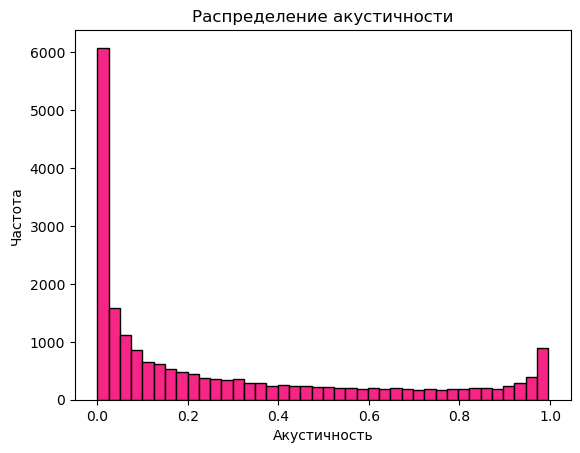

In [204]:
# Создаем гистограмму признака acousticness обучающего датасета
plt.hist(data_train['acousticness'], bins=40, edgecolor='black', color='#F72585')

# Прописываем название гистограммы и оси x и y
plt.xlabel('Акустичность')
plt.ylabel('Частота')
plt.title('Распределение акустичности')

# Выводим гистограмму
plt.show()

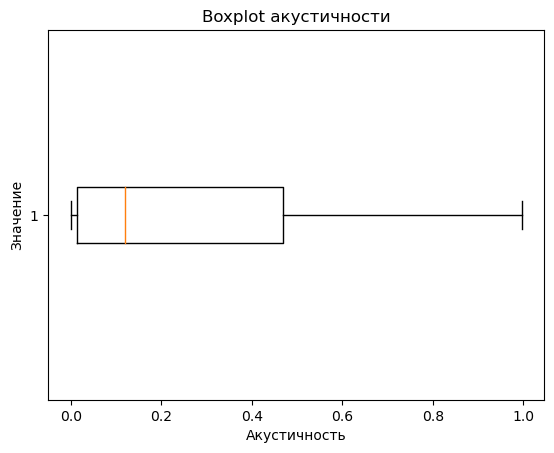

In [66]:
# Создаем boxplot для признака acousticness обучающего датасета
plt.boxplot(data_train['acousticness'], vert=False, showfliers=True)

# Прописываем название оси x и y
plt.xlabel('Акустичность')
plt.ylabel('Значение')

# Прописываем заголовок графика
plt.title('Boxplot акустичности')

# Выводим график
plt.show()

По результатам вывода мы видим, что чаще всего присутствуют записи наименьшей мерой акустичности.
Boxplot показывает, что выбросов в этих данных нет.

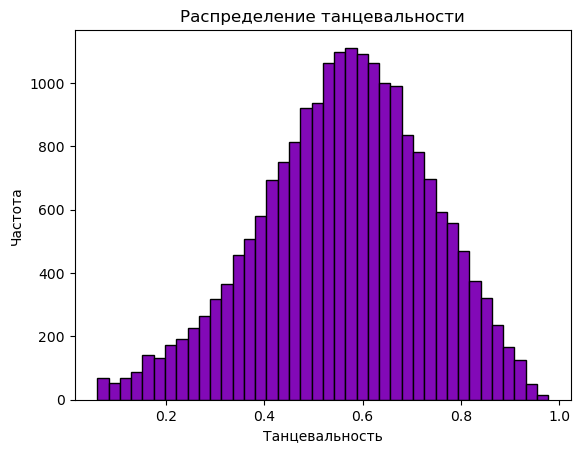

In [43]:
# Создаем гистограмму признака danceability обучающего датасета
plt.hist(data_train['danceability'], bins=40, edgecolor='black', color='#8209B7')

# Прописываем название гистограммы и оси x и y
plt.xlabel('Танцевальность')
plt.ylabel('Частота')
plt.title('Распределение танцевальности')

# Выводим гистограмму
plt.show()


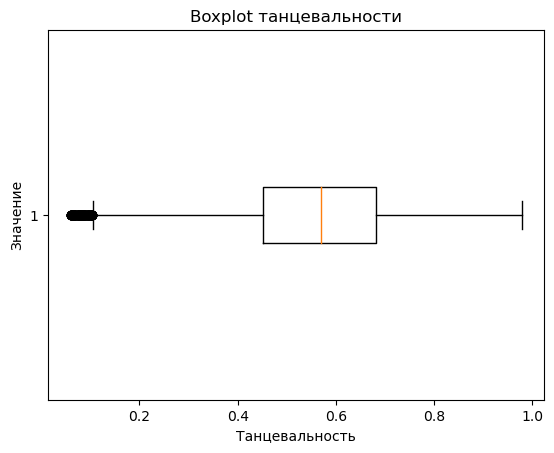

In [67]:
# Создаем boxplot для признака danceability обучающего датасета
plt.boxplot(data_train['danceability'], vert=False, showfliers=True)

# Прописываем название оси x и y
plt.xlabel('Танцевальность')
plt.ylabel('Значение')

# Прописываем заголовок графика
plt.title('Boxplot танцевальности')

# Выводим график
plt.show()

По признаку danceability мы видим, что в основном присутствуют треки с уровнем танцевальности между 0.4 и 0.8.
Boxplot показывет, что есть данные, которые потенциально могут быть выбросами (меньше 0.1).

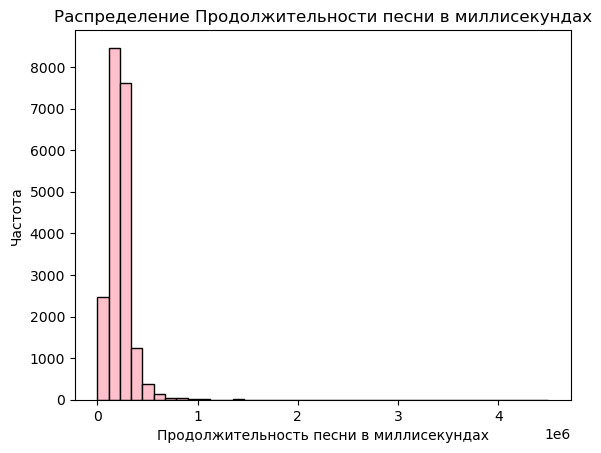

In [44]:
# Создаем гистограмму признака duration_ms обучающего датасета
plt.hist(data_train['duration_ms'], bins=40, edgecolor='black', color='pink')


# Прописываем название гистограммы и оси x и y
plt.xlabel('Продолжительность песни в миллисекундах')
plt.ylabel('Частота')
plt.title('Распределение Продолжительности песни в миллисекундах')

# Выводим гистограмму
plt.show()

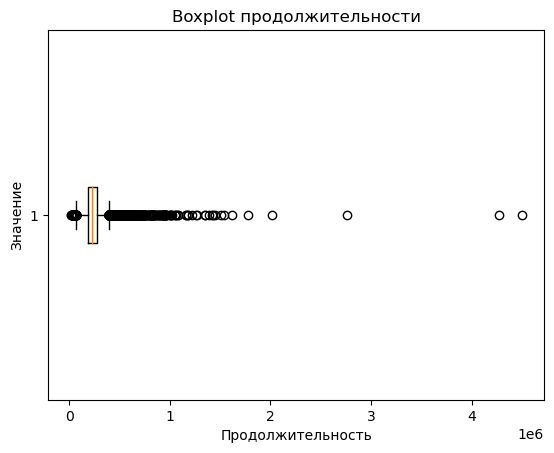

In [68]:
# Создаем boxplot для признака duration_ms обучающего датасета
plt.boxplot(data_train['duration_ms'], vert=False, showfliers=True)

# Прописываем название оси x и y
plt.xlabel('Продолжительность')
plt.ylabel('Значение')

# Прописываем заголовок графика
plt.title('Boxplot продолжительности')

# Выводим график
plt.show()

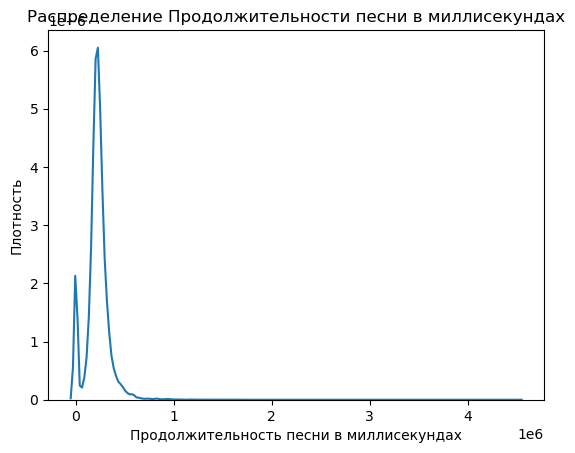

In [45]:
sns.kdeplot(data_train['duration_ms'])
plt.xlabel('Продолжительность песни в миллисекундах')
plt.ylabel('Плотность')
plt.title('Распределение Продолжительности песни в миллисекундах')
plt.show()

In [46]:
# Смотрим на значения признака duration_ms функцией value_counts()
data_train['duration_ms'].value_counts()

-1         2009
 240000      16
 192000      16
 180000      13
 182400      10
           ... 
 198286       1
 142213       1
 368083       1
 223237       1
 271885       1
Name: duration_ms, Length: 13649, dtype: int64

In [47]:
# Смотрим на значения признака duration_ms функцией value_counts()
data_test['duration_ms'].value_counts()

-1         509
 162333      5
 268800      4
 216000      4
 186000      4
          ... 
 261560      1
 211202      1
 232133      1
 238147      1
 256800      1
Name: duration_ms, Length: 4185, dtype: int64

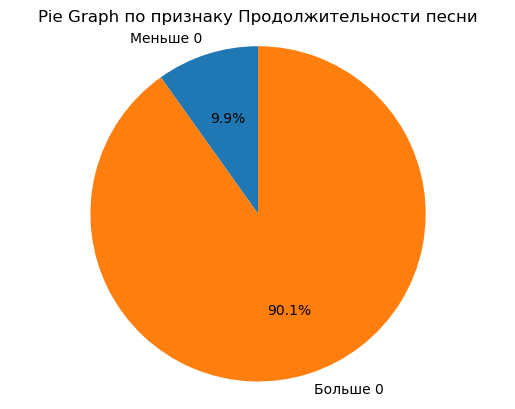

In [48]:
# Создаем диаграмму pie-chart (пирог) для вычесления процентного соотношения отрицательных 
# значений в признаке duration_ms в обучающем датасете
categories = ['Меньше 0', 'Больше 0']
values = [len(data_train[data_train['duration_ms'] < 0]), len(data_train[data_train['duration_ms'] >= 0])]

plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Pie Graph по признаку Продолжительности песни')

plt.show()

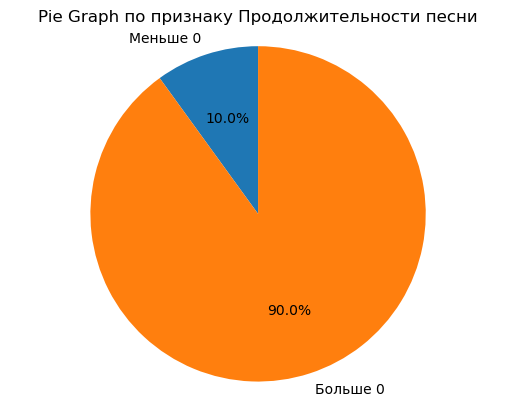

In [49]:
# Создаем диаграмму pie-chart (пирог) для вычесления процентного соотношения отрицательных 
# значений в признаке duration_ms в тестовом датасете
categories = ['Меньше 0', 'Больше 0']
values = [len(data_test[data_test['duration_ms'] < 0]), len(data_test[data_test['duration_ms'] >= 0])]

plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Pie Graph по признаку Продолжительности песни')

plt.show()

In [50]:
# Смотрим на первый 5 строк записей с продолжительностью меньше 0
data_train[data_train['duration_ms'] < 0].head()

,instance_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
13,73565,0.1100,0.470,-1,0.6410,0.000000,9,0.155,-7.454,0,0.0658,86.387,0.6380,1
26,87453,0.9910,0.154,-1,0.0384,0.902000,12,0.109,-26.909,0,0.0405,68.199,0.0393,3
35,76827,0.0848,0.748,-1,0.7120,0.000000,5,0.132,-5.651,0,0.1430,140.055,0.1800,8
50,43888,0.0540,0.482,-1,0.6270,0.000003,5,0.111,-5.779,0,0.0300,95.903,0.1700,0
55,39574,0.9090,0.374,-1,0.2270,0.000069,1,0.686,-18.719,0,0.0579,78.236,0.2640,3


По признаку duration_ms мы определили, что данные продолжительности песни в основном находтся в переделах от 0 до 1. Мы также обнарудили и отрицательные значения как -1.

Учитывая, что в данных количество строк с продолжительснотью трека в мс меньше 0 насчитывается больше 10%, то удалять данные строки будет неправильным, так как это будет существенно влиять на обучение моделей. Принимаем решение оставить эти строки в наборах данных для дальнейшего обучения.

In [ ]:
# Удаляем строки в поле duration_ms удовлетворяющие условию, что продоложительность меньше 0
#data_train.drop(data_train[data_train['duration_ms'] < 0].index, inplace=True)
#data_test.drop(data_test[data_test['duration_ms'] < 0].index, inplace=True)

# Сбрасываем индексы после удаления строк
#data_train.reset_index(drop=True, inplace=True)
#data_test.reset_index(drop=True, inplace=True)

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>ВОПРОС СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>
    
Изначально хотел удалить строки с условием, что продолжительность трека меньше 0, но так и не понял как сделать так, чтобы после разделения выборок в тестовой выборке получилось одинаковое количество строк. Сброс индексов не помог. Возможно, что необходимо изначально объединить обучающий и тестовый датасет в один, затем сделать подготовку данных, включая удаление строк, и после этого уже сделать разбивку на обучающий, валидациооный и тестовый выборки? Просьба прокоментировать.

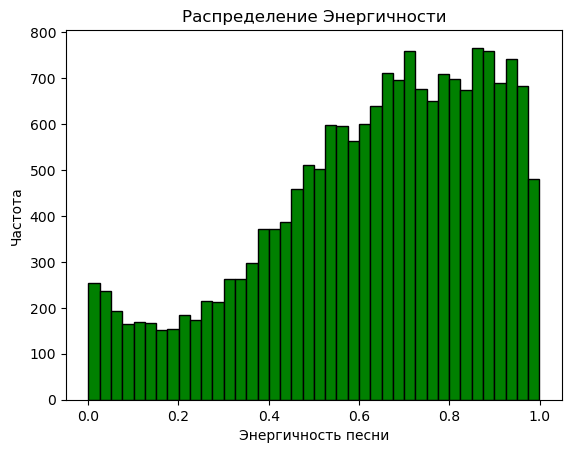

In [53]:
# Создаем гистограмму признака energy обучающего датасета
plt.hist(data_train['energy'], bins=40, edgecolor='black', color='green')

# Прописываем название гистограммы и оси x и y
plt.xlabel('Энергичность песни')
plt.ylabel('Частота')
plt.title('Распределение Энергичности')

# Выводим гистограмму
plt.show()

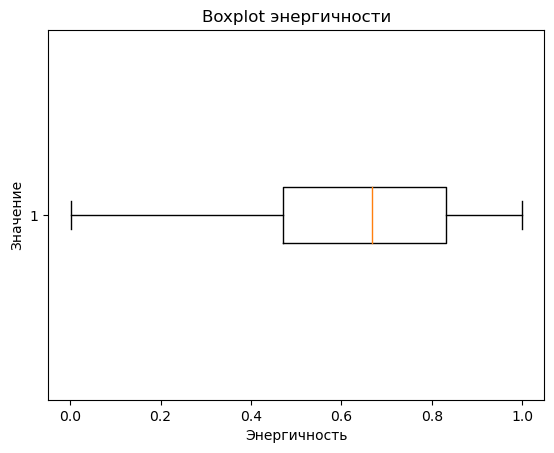

In [69]:
# Создаем boxplot для признака energy обучающего датасета
plt.boxplot(data_train['energy'], vert=False, showfliers=True)

# Прописываем название оси x и y
plt.xlabel('Энергичность')
plt.ylabel('Значение')

# Прописываем заголовок графика
plt.title('Boxplot энергичности')

# Выводим график
plt.show()

Признак energy показывает, что энергичность треков, представленных в данных находится в пределах от 0 до 1 с большим перевесом данных к энергичности. График ящик с усами выбросов не показал.

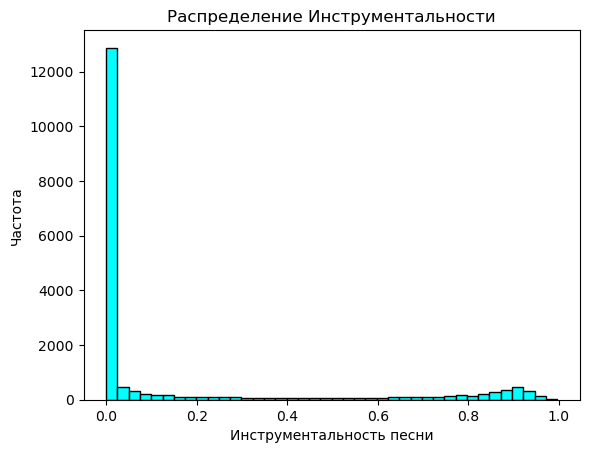

In [54]:
# Создаем гистограмму признака instrumentalness обучающего датасета
plt.hist(data_train['instrumentalness'], bins=40, edgecolor='black', color='#00FFFF')

# Прописываем название гистограммы и оси x и y
plt.xlabel('Инструментальность песни')
plt.ylabel('Частота')
plt.title('Распределение Инструментальности')

# Выводим гистограмму
plt.show()

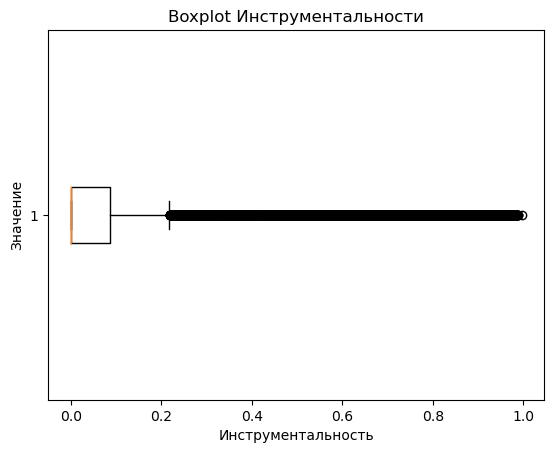

In [70]:
# Создаем boxplot для признака instrumentalness обучающего датасета
plt.boxplot(data_train['instrumentalness'], vert=False, showfliers=True)

# Прописываем название оси x и y
plt.xlabel('Инструментальность')
plt.ylabel('Значение')

# Прописываем заголовок графика
plt.title('Boxplot Инструментальности')

# Выводим график
plt.show()

Признак instrumentalness указывает на то, что большинство данных содержат треки с наличием вокала (значение ближе к 0). Мы также вилим что ящик с усами показал наличие зашумленности данных, начиная с уровня 0.2

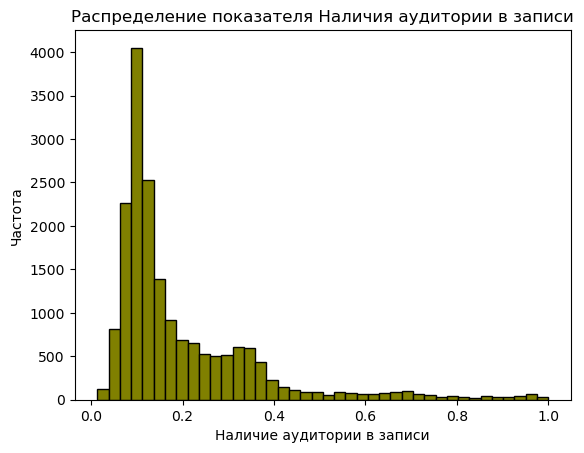

In [56]:
# Создаем гистограмму признака liveness обучающего датасета
plt.hist(data_train['liveness'], bins=40, edgecolor='black', color='#808000')

# Прописываем название гистограммы и оси x и y
plt.xlabel('Наличие аудитории в записи')
plt.ylabel('Частота')
plt.title('Распределение показателя Наличия аудитории в записи')

# Выводим гистограмму
plt.show()

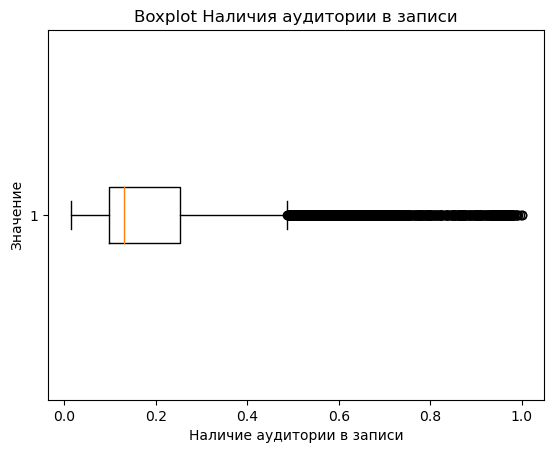

In [71]:
# Создаем boxplot для признака liveness обучающего датасета
plt.boxplot(data_train['liveness'], vert=False, showfliers=True)

# Прописываем название оси x и y
plt.xlabel('Наличие аудитории в записи')
plt.ylabel('Значение')

# Прописываем заголовок графика
plt.title('Boxplot Наличия аудитории в записи')

# Выводим график
plt.show()

Гистограмма по признаку liveness показала нам, что большинство представленных данных имеют тенденцию к пониманию того, что треки исполняются не в живую. График язик с усами показывает на наличие выбросов, начиная с уровня 0.5

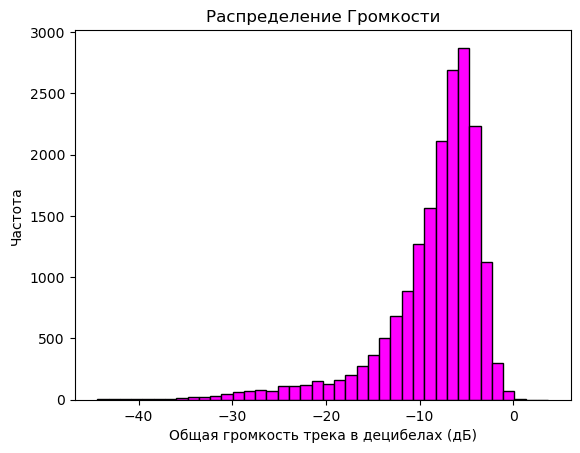

In [57]:
# Создаем гистограмму признака loudness обучающего датасета
plt.hist(data_train['loudness'], bins=40, edgecolor='black', color='#FF00FF')

# Прописываем название гистограммы и оси x и y
plt.xlabel('Общая громкость трека в децибелах (дБ)')
plt.ylabel('Частота')
plt.title('Распределение Громкости')

# Выводим гистограмму
plt.show()

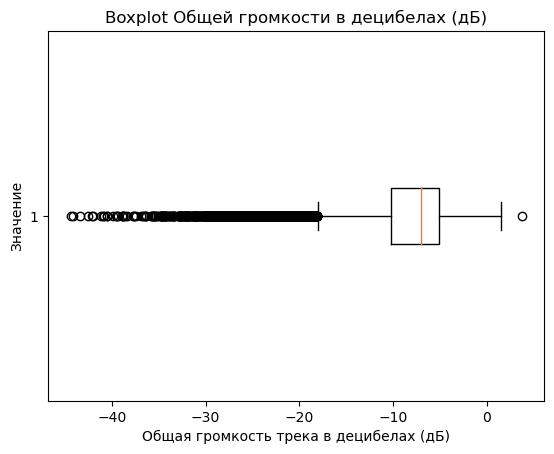

In [72]:
# Создаем boxplot для признака loudness обучающего датасета
plt.boxplot(data_train['loudness'], vert=False, showfliers=True)

# Прописываем название оси x и y
plt.xlabel('Общая громкость трека в децибелах (дБ)')
plt.ylabel('Значение')

# Прописываем заголовок графика
plt.title('Boxplot Общей громкости в децибелах (дБ)')

# Выводим график
plt.show()

Гистограмма по признаку loudness показывает, что большинство данных в этом поле представляют отрийательную громкость в дБ, что на первый взгляд может показаться странным, ведь при отрицательных значениях человеческая слуховая система не способна уловить звук с отрицательным уровнем в дБ. 

После изучения открытых источников было определено, что уровень звуковой мощности, измеряемый в отрицательных децибелах, не является абсолютным значением, а лишь относительной величиной в заданной точке отсчета.
Отрицательные децибелы также широко используются в аудиоинженерии для измерения уровня звука в аудиоаппаратуре и студийных мониторах. В этих случаях, часто используется шкала от -60 до 0 децибелов для удобства измерения шума или звуковой мощности в сигналах.
Источник: https://obzorposudy.ru/polezno/cto-znacit-otricatelnye-decibely

Как вывод, было определено, что представленные данные вполне нормальные и это никакая не ошибка.

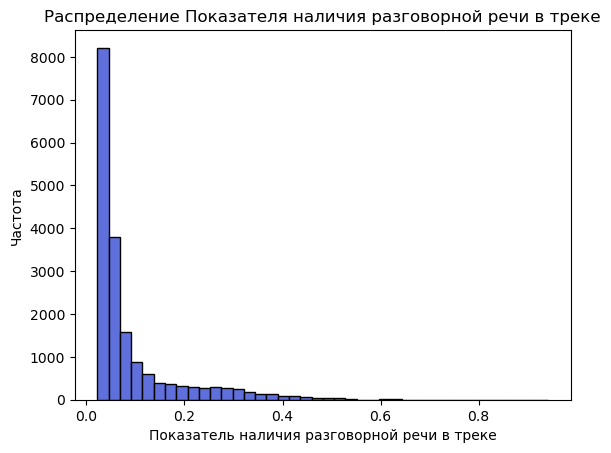

In [59]:
# Создаем гистограмму признака speechiness обучающего датасета
plt.hist(data_train['speechiness'], bins=40, edgecolor='black', color='#5567DAF0')

# Прописываем название гистограммы и оси x и y
plt.xlabel('Показатель наличия разговорной речи в треке')
plt.ylabel('Частота')
plt.title('Распределение Показателя наличия разговорной речи в треке')

# Выводим гистограмму
plt.show()

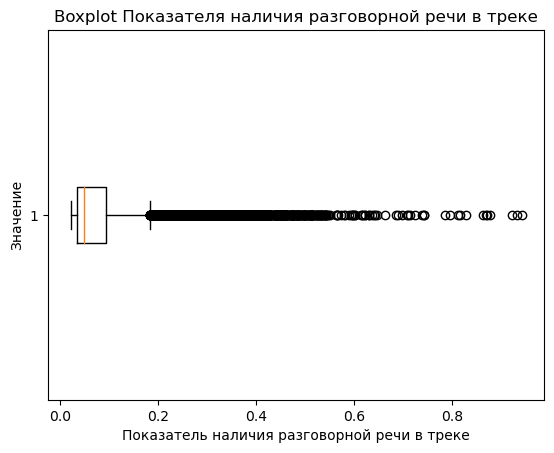

In [73]:
# Создаем boxplot для признака speechiness обучающего датасета
plt.boxplot(data_train['speechiness'], vert=False, showfliers=True)

# Прописываем название оси x и y
plt.xlabel('Показатель наличия разговорной речи в треке')
plt.ylabel('Значение')

# Прописываем заголовок графика
plt.title('Boxplot Показателя наличия разговорной речи в треке')

# Выводим график
plt.show()

Гистограмма по признаку speechiness показала нам, что представленные треки в данных имеет характер не разговорной речи (до 0.66). График ящик с усами показывает на наличии выбросов, начиная с показателя 0.2

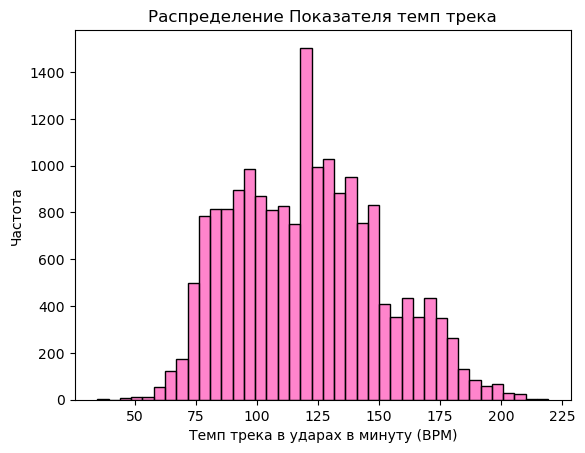

In [60]:
# Создаем гистограмму признака tempo обучающего датасета
plt.hist(data_train['tempo'], bins=40, edgecolor='black', color='#F3A9')

# Прописываем название гистограммы и оси x и y
plt.xlabel('Темп трека в ударах в минуту (BPM)')
plt.ylabel('Частота')
plt.title('Распределение Показателя темпа трека')

# Выводим гистограмму
plt.show()

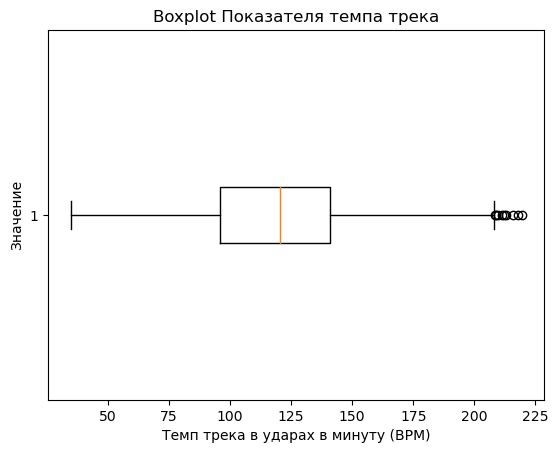

In [74]:
# Создаем boxplot для признака tempo обучающего датасета
plt.boxplot(data_train['tempo'], vert=False, showfliers=True)

# Прописываем название оси x и y
plt.xlabel('Темп трека в ударах в минуту (BPM)')
plt.ylabel('Значение')

# Прописываем заголовок графика
plt.title('Boxplot Показателя темпа трека')

# Выводим график
plt.show()

Признак tempo уазывает, что в основном присутствуют треки со скоростью в BPM между 75 и 150. График boxplot указывает на наличие выросов в данных, начиная с 210.

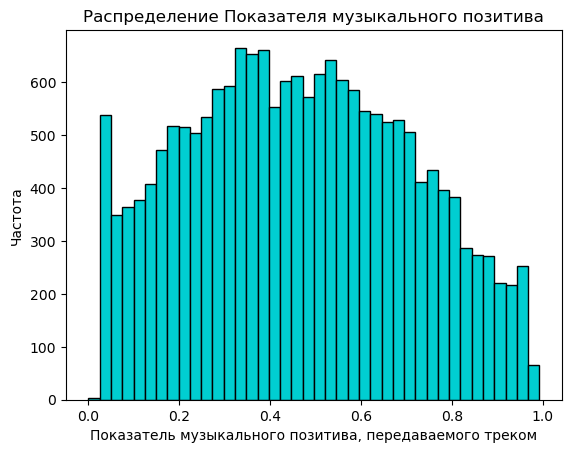

In [61]:
# Создаем гистограмму признака valence обучающего датасета
plt.hist(data_train['valence'], bins=40, edgecolor='black', color='#00CED1')

# Прописываем название гистограммы и оси x и y
plt.xlabel('Показатель музыкального позитива, передаваемого треком')
plt.ylabel('Частота')
plt.title('Распределение Показателя музыкального позитива')

# Выводим гистограмму
plt.show()

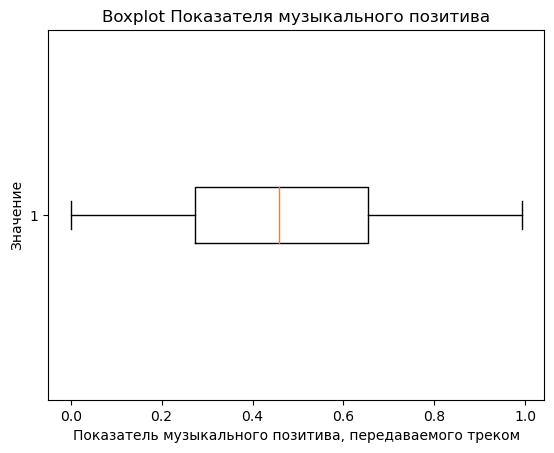

In [75]:
# Создаем boxplot для признака valence обучающего датасета
plt.boxplot(data_train['valence'], vert=False, showfliers=True)

# Прописываем название оси x и y
plt.xlabel('Показатель музыкального позитива, передаваемого треком')
plt.ylabel('Значение')

# Прописываем заголовок графика
plt.title('Boxplot Показателя музыкального позитива')

# Выводим график
plt.show()

Признак valence показывает почти одинаковое распределение в данных треков по позитивности. График ящик с усами выбросов не показал.

## Отбор финального набора обучающих признаков

**4.1 Выбор признаков по уровню корреляции**

Учитывая ранее полученные результаты при формировании тепловой карты, корреляционной матрицы, а также корреляции признаков к целевому признаку было принято решение оставить финальные признаки для дальнейшего обучения моделей с корреляций (положительной и отрицательной) к целевому признаку music_genre больше 2%.

Псоле удаления признаков не удовлетворяющих условию мы создадим переменные для обучени моделей, а также разделим обучающую выборку на обучающую и валидационную в пропорции 1/4.

In [207]:
# Записываем финальный набор обучающих признаков с условием, что минимальный 
# порог корреляции к целевому признаку 2%
threshold = 0.02  # Создаем порог корреляции
correlated_features = corr_matrix[((corr_matrix['music_genre'] > threshold) | (corr_matrix['music_genre'] < -threshold))].index

# Удаляем целевой признак из финального набора обучающих признаков
correlated_features = correlated_features.drop('music_genre')

# Создаем переменные для обучающих признаков и целевого признака
features_corr = data_train[correlated_features]
target = data_train['music_genre']

# Делим обучающий датасет на обучающий и валидационный в пропорции 1/4
X_train, X_val, y_train, y_val = train_test_split(data_train[correlated_features], 
                                                  data_train['music_genre'], 
                                                  test_size=0.25, 
                                                  random_state=12345)
# Применяем финальный набор признаков для тестового датасета
features_test = data_test[correlated_features]


In [208]:
# Проверяем корректность разбивки датасетов
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape, features_test.shape)

(15295, 10) (5099, 10) (15295,) (5099,) (5099, 10)


**5. Выбор и обучение моделей**

Для обучения мы выбрали модели DecisionTreeClassifier, RandomForestClassifier, LogisticRegression.
Мы также подберем гиперпараметры для наших моделей с помощью GridSearchCV и произведем оценку по метрике accuracy (точность) и метрике F1. Также хотел проерить модель SupportVectorClassifier, но так и не смог дождаться окончания процесса подбора ниперпараметров.

Поскольку наш проект - это задача мультикласса, то мы будем устанавливать в настройках расчета метрики F1 показатель average как 'micro' или 'macro'. Проверим оба варианта надстройки.

Macro F1 — это усредненное значение F1 для каждого класса без взвешивания, то есть все классы обрабатываются одинаково.

Micro F1 — это значение F1, рассчитанное по всей матрице ошибок. Подсчитывается общее количество истинно положительных, ложноотрицательных и ложноположительных результатов. Значение Micro F1 рассчитывается аналогично значению глобальной точности или глобальной полноты.

In [219]:
# Создаем и обучаем модель DecisionTreeClassifier
model_dtc = DecisionTreeClassifier()
model_dtc.fit(X_train, y_train)

# Выполняем предсказание на валидационном наборе данных
y_val_pred = model_dtc.predict(X_val)

# Оцениваем производительность модели на валидационном наборе данных
validation_accuracy = accuracy_score(y_val, y_val_pred)
validation_f1_score = f1_score(y_val, y_val_pred, average='micro')

# Выполняем предсказание на тестовом наборе данных
y_test_pred = model_dtc.predict(features_test)

# Выводим результаты
print("Точность на валидационном наборе данных:", validation_accuracy)
print("F1-мера на валидационном наборе данных:", validation_f1_score)
print("Предсказания на тестовом наборе данных:", y_test_pred)


Точность на валидационном наборе данных: 0.32300451068837027
F1-мера на валидационном наборе данных: 0.32300451068837027
Предсказания на тестовом наборе данных: [8 0 5 ... 8 1 7]


In [ ]:
# Подбираем лучшие гиперпараметры для Decision Tree Classifier с помощью GridSearchCV
#parametrs = {'max_depth' : [5, 10, 15],
             #'min_samples_leaf': [2, 4, 6],
             #'min_samples_split': [2, 4, 6]}
#model_dtc_hyper = DecisionTreeClassifier(random_state=12345)
#grid_dtc = GridSearchCV(model_dtc_hyper, parametrs, cv=5)
#grid_dtc.fit(X_train, y_train)
#grid_dtc.best_params_

In [220]:
# Создаем и обучаем модель DecisionTreeClassifier с подобранными гиперпараметрами
model_dtc_hyper = DecisionTreeClassifier(random_state=12345,
                                         max_depth=10, 
                                         min_samples_leaf=6,
                                         min_samples_split=2)
model_dtc_hyper.fit(X_train, y_train)

# Выполняем предсказание на валидационном наборе данных
y_val_pred = model_dtc_hyper.predict(X_val)

# Оцениваем производительность модели на валидационном наборе данных
validation_accuracy = accuracy_score(y_val, y_val_pred)
validation_f1_score = f1_score(y_val, y_val_pred, average='micro')

# Выполняем предсказание на тестовом наборе данных
y_test_pred = model_dtc_hyper.predict(features_test)

# Выводим результаты
print("Точность на валидационном наборе данных:", validation_accuracy)
print("F1-мера на валидационном наборе данных:", validation_f1_score)
print("Предсказания на тестовом наборе данных:", y_test_pred)


Точность на валидационном наборе данных: 0.415767797607374
F1-мера на валидационном наборе данных: 0.41576779760737403
Предсказания на тестовом наборе данных: [8 2 8 ... 8 1 2]


In [214]:
# Создаем и обучаем модель RandomForestClassifier
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, y_train)

# Выполняем предсказание на валидационном наборе данных
y_val_pred = model_rfc.predict(X_val)

# Оцениваем производительность модели на валидационном наборе данных
validation_accuracy = accuracy_score(y_val, y_val_pred)
validation_f1_score = f1_score(y_val, y_val_pred, average='micro')

# Выполняем предсказание на тестовом наборе данных
y_test_pred = model_rfc.predict(features_test)

# Выводим результаты
print("Точность на валидационном наборе данных:", validation_accuracy)
print("F1-мера на валидационном наборе данных:", validation_f1_score)
print("Предсказания на тестовом наборе данных:", y_test_pred)

Точность на валидационном наборе данных: 0.4630319670523632
F1-мера на валидационном наборе данных: 0.4630319670523632
Предсказания на тестовом наборе данных: [8 9 8 ... 8 5 2]


In [ ]:
# Подбираем лучшие гиперпараметры для Random Forest Classifier с помощью GridSearchCV
#parametrs = {'n_estimators': [10, 20, 30],
             #'max_depth': [5, 10, 15],
             #'min_samples_leaf': [2, 4, 6],
             #'min_samples_split': [2, 4, 6]}
#model_rfc_hyper = RandomForestClassifier(random_state=12345)
#grid_rfc = GridSearchCV(model_rfc_hyper, parametrs, cv=5)
#grid_rfc.fit(X_train, y_train)
#grid_rfc.best_params_

In [216]:
# Создаем и обучаем модель RandomForestClassifier с подобранными гиперпараметрами
model_rfc_hyper = RandomForestClassifier(random_state=12345,
                                         max_depth=10, 
                                         min_samples_leaf=4,
                                         min_samples_split=2,
                                         n_estimators=20)
model_rfc_hyper.fit(X_train, y_train)

# Выполняем предсказание на валидационном наборе данных
y_val_pred = model_rfc_hyper.predict(X_val)

# Оцениваем производительность модели на валидационном наборе данных
validation_accuracy = accuracy_score(y_val, y_val_pred)
validation_f1_score = f1_score(y_val, y_val_pred, average='micro')

# Выполняем предсказание на тестовом наборе данных
y_test_pred = model_rfc_hyper.predict(features_test)

# Выводим результаты
print("Точность на валидационном наборе данных:", validation_accuracy)
print("F1-мера на валидационном наборе данных:", validation_f1_score)
print("Предсказания на тестовом наборе данных:", y_test_pred)

Точность на валидационном наборе данных: 0.470092174936262
F1-мера на валидационном наборе данных: 0.470092174936262
Предсказания на тестовом наборе данных: [8 2 8 ... 8 5 2]


In [217]:
# Создаем и обучаем модель Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

# Выполняем предсказание на валидационном наборе данных
y_val_pred = model_lr.predict(X_val)

# Оцениваем производительность модели на валидационном наборе данных
validation_accuracy = accuracy_score(y_val, y_val_pred)
validation_f1_score = f1_score(y_val, y_val_pred, average='micro')

# Выполняем предсказание на тестовом наборе данных
y_test_pred = model_lr.predict(features_test)

# Выводим результаты
print("Точность на валидационном наборе данных:", validation_accuracy)
print("F1-мера на валидационном наборе данных:", validation_f1_score)
print("Предсказания на тестовом наборе данных:", y_test_pred)

Точность на валидационном наборе данных: 0.14649931359090018
F1-мера на валидационном наборе данных: 0.14649931359090018
Предсказания на тестовом наборе данных: [2 5 5 ... 2 0 5]


In [ ]:
# Подбираем лучшие гиперпараметры для Logistic Regression с помощью GridSearchCV
# parameters = {'penalty' : ['l1', 'l2', 'none'],
              # 'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              # 'multi_class' : ['ovr', 'multinominal'],
              # 'C': [0.01, 0.1, 1]}
# model_lr_hyper = LogisticRegression(random_state=12345)
# grid_lr = GridSearchCV(model_lr_hyper, parameters)
# grid_lr.fit(X_train, y_train)
# grid_lr.best_params_

In [218]:
# Создаем и обучаем модель Logistic Regression с подобранными гиперпараметрами
model_lr_hyper = LogisticRegression(random_state=12345,
                                    C=1, 
                                    multi_class='ovr',
                                    penalty='l1',
                                    solver='liblinear')
model_lr_hyper.fit(X_train, y_train)

# Выполняем предсказание на валидационном наборе данных
y_val_pred = model_lr_hyper.predict(X_val)

# Оцениваем производительность модели на валидационном наборе данных
validation_accuracy = accuracy_score(y_val, y_val_pred)
validation_f1_score = f1_score(y_val, y_val_pred, average='micro')

# Выполняем предсказание на тестовом наборе данных
y_test_pred = model_lr_hyper.predict(features_test)

# Выводим результаты
print("Точность на валидационном наборе данных:", validation_accuracy)
print("F1-мера на валидационном наборе данных:", validation_f1_score)
print("Предсказания на тестовом наборе данных:", y_test_pred)

Точность на валидационном наборе данных: 0.4034124338105511
F1-мера на валидационном наборе данных: 0.40341243381055103
Предсказания на тестовом наборе данных: [8 1 8 ... 8 5 2]


In [ ]:
# Создаем и обучаем модель Support Vector Classifier
# model_svc = SVC()
# model_svc.fit(X_train, y_train)

# Выполняем предсказание на валидационном наборе данных
# y_val_pred = model_svc.predict(X_val)

# Оцениваем производительность модели на валидационном наборе данных
# validation_accuracy = accuracy_score(y_val, y_val_pred)
# validation_f1_score = f1_score(y_val, y_val_pred, average='weighted')

# Выполняем предсказание на тестовом наборе данных
# y_test_pred = model_svc.predict(features_test)

# Выводим результаты
# print("Accuracy on the validation dataset:", validation_accuracy)
# print("F1 score on the validation dataset:", validation_f1_score)
# print("Predictions on the test dataset:", y_test_pred)

In [ ]:
# Подбираем лучшие гиперпараметры для Support Vector Classifier с помощью GridSearchCV
# parameters = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
              # 'C': [0.01, 0.1, 1]}
# model_svc_hyper = SVC(random_state=12345)
# grid_svc = GridSearchCV(model_svc_hyper, parameters)
# grid_svc.fit(X_train, y_train)
# grid_svc.best_params_

In [ ]:
# Создаем и обучаем модель Support Vector Classifier с подобранными гиперпараметрами
# model_svc_hyper = LogisticRegression(random_state=12345,
                                    # C=1, 
                                    # kernel='')
# model_svc_hyper.fit(X_train, y_train)

# Выполняем предсказание на валидационном наборе данных
# y_val_pred = model_svc_hyper.predict(X_val)

# Оцениваем производительность модели на валидационном наборе данных
# validation_accuracy = accuracy_score(y_val, y_val_pred)
# validation_f1_score = f1_score(y_val, y_val_pred, average='weighted')

# Выполняем предсказание на тестовом наборе данных
# y_test_pred = model_svc_hyper.predict(features_test)

# Выводим результаты
# print("Точность на валидационном наборе данных:", validation_accuracy)
# print("F1-мера на валидационном наборе данных:", validation_f1_score)
# print("Предсказания на тестовом наборе данных:", y_test_pred)

Мы провели обучение 3 моделей, включая DecisionTreeClassifier, RandomForestClassifier, LogisticRegression и получили следующие резальтаты:

**Модель DecisionTreeClassifier**
Была создана и обучена модель DecisionTreeClassifier без подбора гиперпараметров. Ее точность на валидационном наборе данных была 0.323, а F1-мера - 0.323.

Были подобраны лучшие гиперпараметры для модели DecisionTreeClassifier с помощью GridSearchCV: max_depth=10, min_samples_leaf=6, min_samples_split=2. Затем была создана и обучена модель с этими подобранными гиперпараметрами. Результаты модели улучшились: точность на валидационном наборе данных стала 0.416, а F1-мера - 0.416.

**Модель RandomForestClassifier**
Была создана и обучена модель RandomForestClassifier без подбора гиперпараметров. Ее точность на валидационном наборе данных была 0.463, а F1-мера - 0.463.

Были подобраны лучшие гиперпараметры для модели RandomForestClassifier с помощью GridSearchCV: max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=20. Затем была создана и обучена модель с этими подобранными гиперпараметрами. Результаты модели были улучшены и составили: точность на валидационном наборе данных стала 0.470, а F1-мера - 0.470.

**Модель Logisticregression**
Была создана и обучена модель Logistic Regression без подбора гиперпараметров. Ее точность на валидационном наборе данных была 0.146, а F1-мера - 0.146.

Были подобраны лучшие гиперпараметры для модели Logistic Regression с помощью GridSearchCV: C=1, multi_class='ovr', penalty='l1', solver='liblinear'. Затем была создана и обучена модель с этими подобранными гиперпараметрами. Результаты модели существенно улучшились и были следующими: точность на валидационном наборе данных стала 0.403, а F1-мера - 0.403.

По результатам обучения и подбора гиперпараметров лучшей моделью оказалась RandomForestClassifier с показателями:
Точность предсказаний: 0.470
Мера F1: 0.470

Следующим шагом проверим данную модель на тестовой выборке и подготовим файл для сабмита на Kaggle.


In [221]:
# Записываем лучшую модель в переменную best_model
best_model = model_rfc_hyper

# Формируем предсказание на тестовой выборке
predicted_labels = best_model.predict(features_test)

In [223]:
# Декодируем метки классов обратно в исходные значения жанров с помошью inverse_transform
predicted_genres = label_encoded_mg.inverse_transform(predicted_labels)

# Проверяем сделанные преобразования
predicted_genres

array(['Rap', 'Blues', 'Rap', ..., 'Rap', 'Electronic', 'Blues'],
      dtype=object)

In [229]:
# Извлекаем столбец 'instance_id' из датафрейма data_test для синхронизации индексов 
# и присваиваем его переменной index.
index = data_test['instance_id']
index

0       48564
1       72394
2       88081
3       78331
4       72636
        ...  
5094    50532
5095    26255
5096    67924
5097    79778
5098    47986
Name: instance_id, Length: 5099, dtype: int64

In [230]:
# Создаем новый объект DataFrame с именем submit_df с полями 'instance_id' со значением переменной index
# и поля 'music_genre' с предсказанием
submit_df = pd.DataFrame({'instance_id' : index, 'music_genre' : predicted_genres}, columns = ['instance_id', 'music_genre'])

In [231]:
# Проверяем объект DataFrame
submit_df

,instance_id,music_genre
0,48564,Rap
1,72394,Blues
2,88081,Rap
3,78331,Country
4,72636,Alternative
...,...,...
5094,50532,Country
5095,26255,Alternative
5096,67924,Rap
5097,79778,Electronic


In [232]:
# Формируем файл для сабмита на Kaggle, удаляем индекс как это требует проверочный файл через Index=False
submit_df.to_csv("best_model_music_genere_prediction_rev5.csv", index=False)

**ВЫВОД**

В ходе выполнения проекта по классификации музыкальных произведений по жанрам для сервиса "МиФаСоль" были выполнены следующие этапы работы: 1. Загрузка и ознакомление с данными, 2. Предварительная обработка данных, 3. Разведочный анализ данных, 4. Отбор финального набора обучающих признаков и 5. Выбор моделей для обучения.

После загрузки и ознакомления с данными было выявлено, что обучающий датасет содержит 20394 записей и 16 полей, а тестовый датасет - 5099 записей и 15 полей. Целевой признак для предсказания 'music_genre' был исключен из тестового датасета. Было обнаружено несколько проблем, таких как различные типы данных в поле 'instance_id' и наличие пропусков в некоторых полях (key, mode и tempo.

Для предварительной обработки данных были удалены ненужные поля, а именно track_name и obtained_at. Также были обработаны пропуски и удалены дубликаты. Категориальные пропуски в полях key и mode были заменены на значение 'unknown', а числовые пропуски в поле tempo - на среднее значение.

В разведочном анализе данных были проведены дополнительные исследования, включая визуализацию и анализ корреляций. Были выбраны финальные признаки на основе их корреляции с целевым признаком 'music_genre', а также условии, что уровень корреляции не ниже 0,02 (как положительная, так и отрицательная).

Для обучения моделей были выбраны DecisionTreeClassifier, RandomForestClassifier и LogisticRegression. Были подобраны лучшие гиперпараметры для каждой модели с использованием GridSearchCV. Лучшей моделью оказалась RandomForestClassifier с точностью предсказаний 0.470 и мерой F1 0.470.

Финальным шагом мы проверили модель на тестовой выборке и подготовили файл для сабмита на Kaggle. Результат на Kaggle - 0.46235 (16 место).
